In [ ]:
import torch
from torch import nn, optim

from torchvision import datasets  # existe também o torchtext
from torchvision import transforms

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

args = {
    'batch_size': 20,
    'num_workers': 4
}

if torch.cuda.is_available():
  args['device'] = torch.device('cuda')
else:
  args['device'] = torch.device('cpu')

print(args)

{'batch_size': 20, 'num_workers': 4, 'device': device(type='cuda')}


In [ ]:
train_set = datasets.MNIST('./',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_set = datasets.MNIST('./',
                           train=False,
                           transform=transforms.ToTensor(),
                           download=False)

print('Amostras de treino: ' + str(len(train_set)) + '\nAmostras de teste: ' + str(len(test_set)))

Amostras de treino: 60000
Amostras de teste: 10000


In [ ]:
# O conjunto de dados é uma classe específica do dataset
# Por isso, é importante implementar uma classe sempre que formos utilizar/criar um
# Cada elemento do conjunto é uma TUPLA (dado, rótulo). O dado, nesse caso é uma imagem e o rótulo é sua classe

print(type(train_set))
print(type(train_set[0]))

<class 'torchvision.datasets.mnist.MNIST'>
<class 'tuple'>


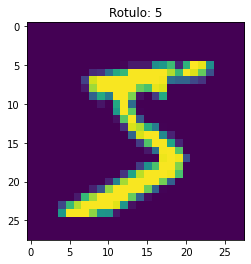

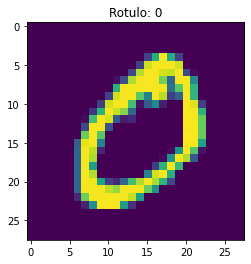

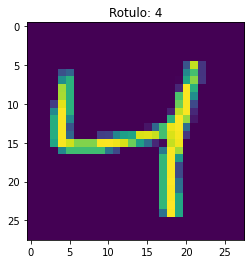

In [ ]:
for i in range(3):
  dado, rotulo = train_set[i]

  plt.figure()
  plt.imshow(dado[0])
  plt.title('Rotulo: '+ str(rotulo))

<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>


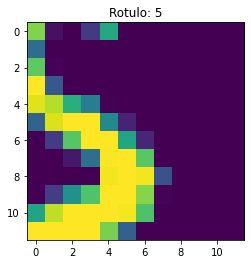

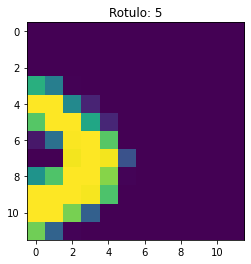

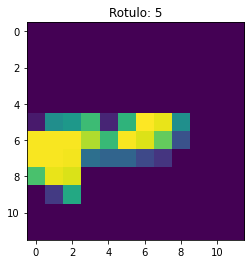

In [ ]:
# Podemos alterar a transformação para o RandomCrop, mostrando que podemos usar versões "recortadas" de cada imagem
# Detalhe que agora, os dados são imagens, não tensores
train_set = datasets.MNIST('./',
                           train=True,
                           transform=transforms.RandomCrop(12),
                           download=False)

for i in range(3):
  dado, rotulo = train_set[0]

  print(type(dado))

  plt.figure()
  plt.imshow(dado)
  plt.title('Rotulo: '+ str(rotulo))

# Dataloader

### Funcionalidade muito útil do PyTorch, que fornece as seguintes funcionalidades:

*   Separação dos dados em batches
*   Embaralhamento dos dados
*   Carregamento dos batches em paralelo utilizando *threads*


##### Sintaxe: 

```
train_loader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)
```

```
*   dataset: conjunto de dados de treino
*   batch_size: tamanho do batch
*   shuffle: flag do embaralhamento
*   num_workers: número de threads paralelas
```






In [ ]:
train_loader = DataLoader(train_set,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers'])

# Obs: lembrar de utilizar a transformação transform.ToTensor() antes de executar esta célula
test_loader = DataLoader(test_set,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers'])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([20, 1, 28, 28]) torch.Size([20])


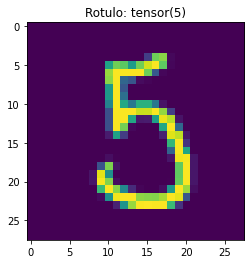

In [ ]:
for batch in train_loader:

  dado, rotulo = batch
  print(dado.size(), rotulo.size())

  plt.imshow(dado[0][0])
  plt.title('Rotulo: ' + str(rotulo[0]))

  break